# *Load data*

In [43]:
from sklearn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [5]:
# load dataset
train_data_path = './data/sign_mnist_train.csv'
test_data_path = './data/sign_mnist_test.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_X = np.array(train_data[train_data.columns[1:]])
trainY = np.array(train_data['label'])

test_X = np.array(test_data[test_data.columns[1:]])
testY = np.array(test_data['label'])

label_index = 'ABCDEFGHIKLMNOPQRSTUVWXY'
labels = np.unique(np.array(train_data['label']))
print(train_data.shape)
print(test_data.shape)
print(np.unique(np.array(train_data['label'])))

(27455, 785)
(7172, 785)
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


<BarContainer object of 24 artists>

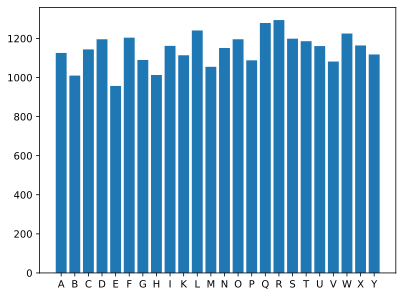

In [6]:
class_count = np.array(train_data.groupby('label').agg('count')['pixel1'])
x_axis = [idx for idx in label_index if idx not in 'JZ']
plt.bar(x_axis, class_count)

# *Feature Representations*

In [7]:
## 1.feature normalization (StandardScaler)
scaler = preprocessing.StandardScaler()
train_X1 = scaler.fit_transform(train_X)
test_X1 = scaler.transform(test_X)
print(train_X)
print(train_X1)
print(test_X)
print(test_X1)

[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]
[[-0.92895113 -0.76362507 -0.62085156 ...  0.66406257  0.65811336
   0.65493948]
 [ 0.23165213  0.2128048   0.12168008 ... -0.93157535 -0.41091344
  -0.16809718]
 [ 1.00538763  0.98894136  0.94102534 ...  0.52187701  0.51662452
   0.54623652]
 ...
 [ 0.69105758  0.63842807  0.58256179 ...  0.63246578  0.61095041
   0.62388149]
 [ 0.76359529  0.81368471  0.83860719 ... -1.54771277 -1.16552059
  -1.03772083]
 [ 0.81195376  0.78864805  0.73618903 ...  0.67986097  0.75243925
   0.8568164 ]]
[[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]]
[[ 0.08657672  0.01251149 -0.03194715 ... -0.78938979 -0.64672817
  -0.82031492]
 [-0.46954568 -0.51325843 -0.5184334  ...  

# *Dimension Reduction*

In [8]:
## 1.PCA
pca_reducer = decomposition.PCA()
train_X2 = pca_reducer.fit_transform(train_X1)
test_X2 = pca_reducer.transform(test_X1)

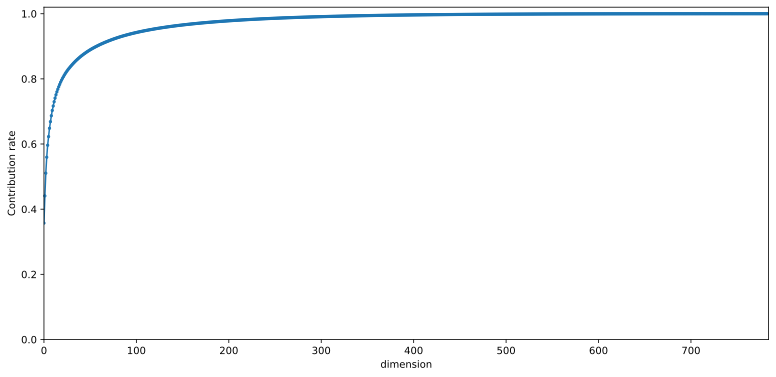

In [9]:
# Draw a cumulative contribution rate graph
plt.figure(figsize=(13, 6))

plt.plot(range(0,784), np.cumsum(pca_reducer.explained_variance_ratio_))
plt.scatter(range(0,784),np.cumsum(pca_reducer.explained_variance_ratio_),s=5)
plt.xlim(0, 784)
plt.ylim(0, 1.02)

plt.xlabel('dimension')
plt.ylabel('Contribution rate')
plt.show()

In [11]:
# choosing n_components =500
pca_reducer = decomposition.PCA(n_components =500)
train_X3 = pca_reducer.fit_transform(train_X1)
test_X3 = pca_reducer.transform(test_X1)
print(train_X3.shape)
print(test_X3.shape)

(27455, 500)
(7172, 500)


# *Linear Classifier: Logistic Regression*

In [ ]:
# lg model 1 (cross-validation to find best hyperparameters)
lg_cv = linear_model.LogisticRegressionCV(Cs=logspace(-3,3,20), cv=5,n_jobs =4)
lg_cv.fit(train_X3, trainY)

In [35]:
pred_trainY = lg_cv.predict(train_X3)
print("train accuracy: ",metrics.accuracy_score(trainY, pred_trainY))
pred_testY = lg_cv.predict(test_X3)
print("test accuracy: ",metrics.accuracy_score(testY, pred_testY))

train accuracy:  1.0
test accuracy:  0.6968767428890128


In [ ]:
# lg model 2 (increase max_iter = 400)
lg_cv2 = linear_model.LogisticRegressionCV(Cs=logspace(-3,3,20), cv=5,n_jobs =4,max_iter=400)
lg_cv2.fit(train_X3, trainY)

In [36]:
pred_trainY = lg_cv2.predict(train_X3)
print("train accuracy: ",metrics.accuracy_score(trainY, pred_trainY))
pred_testY = lg_cv2.predict(test_X3)
print("test accuracy: ",metrics.accuracy_score(testY, pred_testY))

train accuracy:  1.0
test accuracy:  0.6959007250418293


In [ ]:
# lg model 3 (without Feature Normalization and Dimension Reduction)
lg_cv3 = linear_model.LogisticRegressionCV(Cs=logspace(-3,3,20), cv=5,n_jobs =4)
lg_cv3.fit(train_X, trainY)

In [38]:
pred_trainY = lg_cv3.predict(train_X)
print("train accuracy: ",metrics.accuracy_score(trainY, pred_trainY))
pred_testY = lg_cv3.predict(test_X)
print("test accuracy: ",metrics.accuracy_score(testY, pred_testY))

train accuracy:  1.0
test accuracy:  0.6866982710540993


# *Linear Classifier: SVM (kernel='linear')*

In [44]:
# GridSearchCV
hyper_params = {'C':logspace(-3,3,20)}
clf = GridSearchCV(SVC(kernel='linear'),hyper_params,cv=5,n_jobs =4)
clf.fit(train_X3, trainY)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=4,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])})

In [46]:
pred_trainY = clf.predict(train_X3)
print("train accuracy: ",metrics.accuracy_score(trainY, pred_trainY))
pred_testY = clf.predict(test_X3)
print("test accuracy: ",metrics.accuracy_score(testY, pred_testY))

train accuracy:  1.0
test accuracy:  0.8063301728945901


# *Best model (linear classifier)*

In [49]:
## In conlusion, the best linear classifier is SVM(kernel='linear'), with fearture normalization and dimension reduction. 
print("Best linear Classifier:\n",clf)

Best linear Classifier:
 GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=4,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])})


In [50]:
pred_trainY = clf.predict(train_X3)
print("train accuracy: ",metrics.accuracy_score(trainY, pred_trainY))
pred_testY = clf.predict(test_X3)
print("test accuracy: ",metrics.accuracy_score(testY, pred_testY))

train accuracy:  1.0
test accuracy:  0.8063301728945901


In [51]:
# get TP matrix
label_df = pd.DataFrame({
    'True':testY,
    'Pred':pred_testY
})

# get True Positive for each label
def cal_TP_matrix(label_df):
    TP_matrix = np.zeros((24,24))

    for lb in labels:
        ture_count = label_df.loc[label_df['True'] == lb].groupby('Pred').agg(
            'count')
        for pred_idx, row in ture_count.iterrows():
            lb_idx = lb if lb < 9 else lb-1
            pred_idx = pred_idx if pred_idx < 9 else pred_idx-1
            TP_matrix[lb_idx][pred_idx] = row[0]

    return TP_matrix

def cal_TPR(label_df):
    RP = label_df.groupby('True').agg('count')
    PP = label_df.groupby('Pred').agg('count')
    TP = label_df.loc[label_df['True']==label_df['Pred']].groupby('True').agg('count')
    
    precision = np.array(TP).T[0] / np.array(PP).T[0]
    recall = np.array(TP).T[0] / np.array(RP).T[0]
    return precision, recall

cal_TPR(label_df)

(array([0.83797468, 1.        , 0.83557951, 0.90740741, 0.95402299,
        0.74161074, 0.86720867, 0.97777778, 0.74181818, 0.62361624,
        0.73839662, 0.81005587, 0.79220779, 0.89552239, 0.90364583,
        0.92090395, 0.34065934, 0.652     , 0.8       , 0.59782609,
        0.7492163 , 0.73410405, 0.68055556, 0.85239852]),
 array([1.        , 0.94907407, 1.        , 1.        , 1.        ,
        0.89473684, 0.91954023, 0.90825688, 0.70833333, 0.51057402,
        0.83732057, 0.73604061, 0.62886598, 0.73170732, 1.        ,
        0.99390244, 0.64583333, 0.66260163, 0.70967742, 0.62030075,
        0.69075145, 0.61650485, 0.5505618 , 0.69578313]))

In [52]:
pd.options.display.max_columns = None

label_index = [i for i in label_index]
TPmx = cal_TP_matrix(label_df)
pd.DataFrame(TPmx, label_index, label_index)

,A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,410.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0
C,0.0,0.0,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,20.0,0.0,0.0,221.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,3.0,0.0,28.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
I,22.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,204.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0
K,0.0,0.0,0.0,7.0,0.0,45.0,0.0,0.0,19.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,2.0,0.0,20.0,0.0,20.0,0.0,20.0
